In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving ratings.dat to ratings.dat
Saving users.dat to users.dat
Saving movies.dat to movies.dat


In [4]:
movies = pd.read_csv('movies.dat', sep='::',engine='python',encoding='latin-1',names=['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users =pd.read_csv('users.dat', sep='::',engine='python',encoding='latin-1',names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings =pd.read_csv('ratings.dat', sep='::',engine='python',encoding='latin-1',names=['UserID','MovieID','Rating','Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies.dropna(inplace=True)

In [8]:
users.dropna(inplace=True)

In [9]:
ratings.dropna(inplace=True)

In [10]:
data = pd.concat([movies,users,ratings],axis=1)
data.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,UserID,MovieID,Rating,Timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     3883 non-null     float64
 1   Title       3883 non-null     object 
 2   Genres      3883 non-null     object 
 3   UserID      6040 non-null     float64
 4   Gender      6040 non-null     object 
 5   Age         6040 non-null     float64
 6   Occupation  6040 non-null     float64
 7   Zip-code    6040 non-null     object 
 8   UserID      1000209 non-null  int64  
 9   MovieID     1000209 non-null  int64  
 10  Rating      1000209 non-null  int64  
 11  Timestamp   1000209 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [12]:
data.describe()

,MovieID,UserID,Age,Occupation,UserID,MovieID,Rating,Timestamp
count,3883.000000,6040.000000,6040.000000,6040.000000,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1986.049446,3020.500000,30.639238,8.146854,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1146.778349,1743.742145,12.895962,6.329511,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,982.500000,1510.750000,25.000000,3.000000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,2010.000000,3020.500000,25.000000,7.000000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,2980.500000,4530.250000,35.000000,14.000000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,3952.000000,6040.000000,56.000000,20.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


# Exploratory Data Analysis

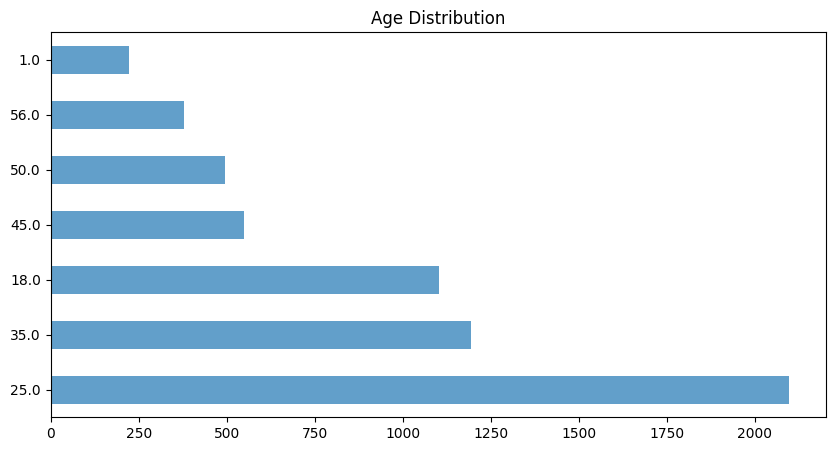

In [13]:
data['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,5))
plt.title('Age Distribution')
plt.show()

Text(0.5, 0, 'Age')

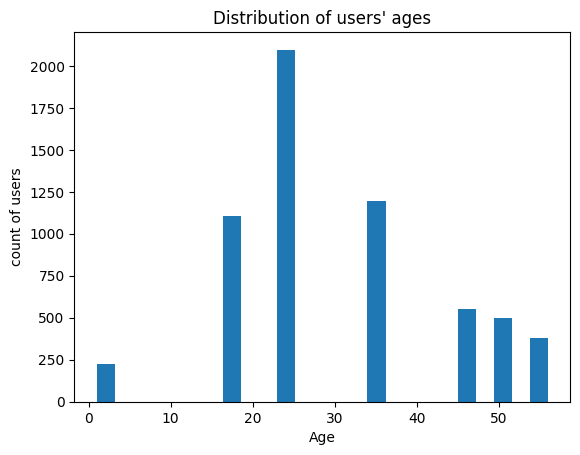

In [14]:
data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.head(500)

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,UserID,MovieID,Rating,Timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291
...,...,...,...,...,...,...,...,...,...,...,...,...
495,499.0,Mr. Wonderful (1993),Comedy|Romance,496.0,M,18.0,4.0,55455,6,1296,3,978236519
496,500.0,Mrs. Doubtfire (1993),Comedy,497.0,F,25.0,17.0,55412,6,838,4,978237444
497,501.0,Naked (1993),Drama,498.0,M,35.0,17.0,55113,6,1007,3,978238036
498,502.0,"Next Karate Kid, The (1994)",Action|Children's,499.0,F,25.0,1.0,55108,6,1947,5,978237767


In [18]:
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels= age_groups)
data[['Age', 'age_group']].drop_duplicates()[ :10]

,Age,age_group
0,1.0,0-9
1,56.0,50-59
2,25.0,20-29
3,45.0,40-49
5,50.0,50-59
6,35.0,30-39
17,18.0,10-19
6040,NaN,NaN


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Age'], **{})
chart

Text(0.5, 1.0, 'Age Distribution')

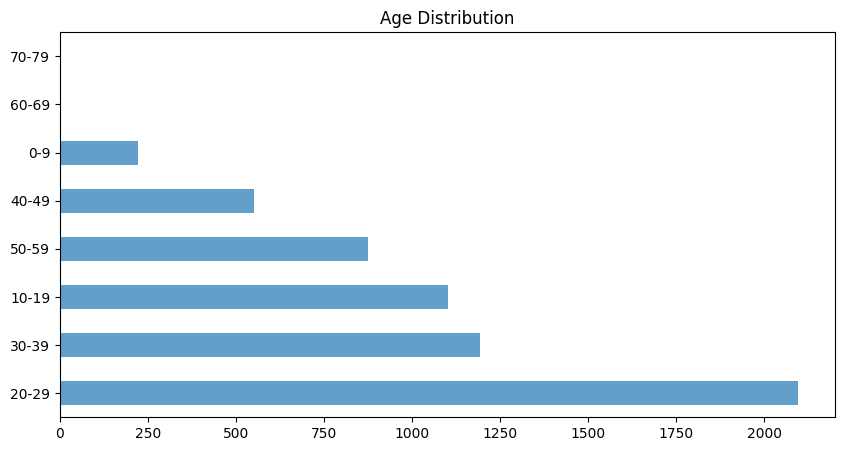

In [20]:
data['age_group'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,5))
plt.title('Age Distribution')

Text(0.5, 1.0, 'Ratings Distribution')

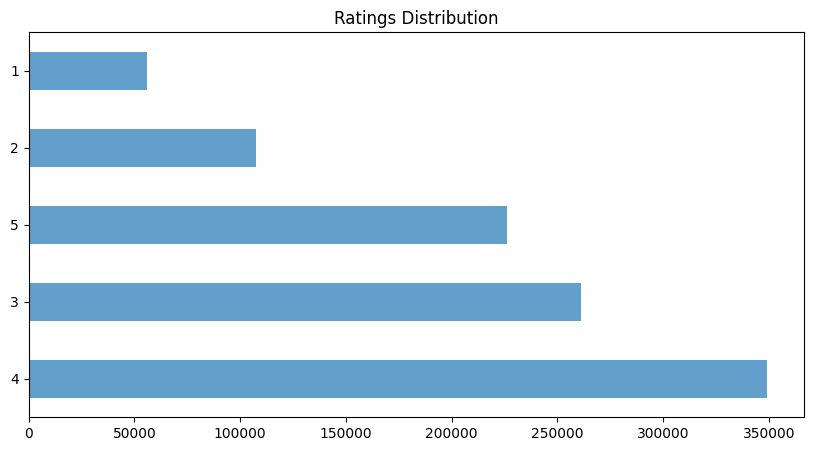

In [23]:
data['Rating'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,5))
plt.title('Ratings Distribution')

In [24]:
testing = data[ :500]
testing.dropna(inplace=True)


<ipython-input-24-4b1f36c3e58d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing.dropna(inplace=True)


In [25]:
testing

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,UserID,MovieID,Rating,Timestamp,age_group
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760,0-9
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109,50-59
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968,20-29
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275,40-49
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,499.0,Mr. Wonderful (1993),Comedy|Romance,496.0,M,18.0,4.0,55455,6,1296,3,978236519,10-19
496,500.0,Mrs. Doubtfire (1993),Comedy,497.0,F,25.0,17.0,55412,6,838,4,978237444,20-29
497,501.0,Naked (1993),Drama,498.0,M,35.0,17.0,55113,6,1007,3,978238036,30-39
498,502.0,"Next Karate Kid, The (1994)",Action|Children's,499.0,F,25.0,1.0,55108,6,1947,5,978237767,20-29


In [27]:
test = testing.drop(['Title', 'Genres', 'UserID', 'Gender', 'Zip-code','Timestamp', 'age_group'], axis=1)
test

,MovieID,Age,Occupation,MovieID,Rating
0,1.0,1.0,10.0,1193,5
1,2.0,56.0,16.0,661,3
2,3.0,25.0,15.0,914,3
3,4.0,45.0,7.0,3408,4
4,5.0,25.0,20.0,2355,5
...,...,...,...,...,...
495,499.0,18.0,4.0,1296,3
496,500.0,25.0,17.0,838,4
497,501.0,35.0,17.0,1007,3
498,502.0,25.0,1.0,1947,5


In [28]:
features = test[['MovieID','Age','Occupation']].values

In [30]:
y = test['Rating'].values
X = features

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)


In [41]:
y_pred

array([4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 5, 4, 4,
       5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 3, 5, 4, 3, 4, 5, 4, 4, 4, 2, 5, 5,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 5, 4,
       4, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 5,
       4, 4, 5, 4, 4, 5, 5, 4, 4, 5, 4])

In [43]:
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

33.73

In [45]:
results = {'Actual ': y_test,
           'Predicted' : y_pred}

results

{'Actual ': array([2, 2, 3, 4, 4, 4, 3, 4, 5, 3, 4, 5, 4, 4, 3, 3, 3, 4, 5, 2, 5, 3,
        1, 4, 3, 4, 3, 4, 3, 2, 5, 4, 3, 4, 3, 5, 4, 4, 5, 5, 4, 5, 5, 4,
        4, 4, 5, 4, 2, 5, 4, 4, 5, 4, 3, 4, 1, 5, 4, 3, 3, 2, 3, 3, 5, 5,
        4, 5, 5, 4, 3, 2, 4, 2, 3, 2, 1, 3, 4, 5, 4, 4, 3, 5, 4, 4, 1, 3,
        5, 4, 3, 3, 2, 3, 3, 4, 5, 2, 4, 4, 1, 3, 4, 3, 3, 3, 4, 4, 2, 3,
        4, 4, 5, 5, 5, 3, 4, 4, 5, 4, 5, 3, 3, 5, 5, 4, 5, 3, 5, 1, 4, 3,
        4, 4, 3, 4, 5, 3, 4, 3, 3, 2, 4, 3, 5, 4, 5, 4, 4, 5, 3, 4, 5, 3,
        4, 3, 4, 4, 3, 3, 3, 2, 4, 3, 3]),
 'Predicted': array([4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 3, 4,
        4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 5, 4, 4,
        5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 3, 5, 4, 3, 4, 5, 4, 4, 4, 2, 5, 5,
        4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4,
        4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4

In [46]:
dataframe = pd.DataFrame(results)

In [47]:
dataframe.head(10)

,Actual,Predicted
0,2,4
1,2,5
2,3,4
3,4,5
4,4,5
5,4,4
6,3,4
7,4,5
8,5,4
9,3,4


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Actual '], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Actual '], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Actual ', 'Predicted']]], **{})
chart